Usaremos o conjunto de dados digits, que consiste em conjunto de imagens de 0 a 9

In [16]:
from sklearn import datasets
digits = datasets.load_digits()

In [17]:
print (digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [18]:
print (digits.data[0])
#esse print retorna numeros que representam escalas de cor

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [19]:
print (digits.images[0])
#essa visualização retorna uma matriz de 8x8, como sao os dados desse conjunto

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


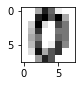

In [20]:
#para visualizar a imagem, vamos usar matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

Agora vamos usar o SVM (support vector machine) para trienar nossa máquina. O SVM cria uma linha (hyperplan) com a maior distancia entre os pontos possível.

In [21]:
from sklearn.model_selection import train_test_split
x= digits.data
y=digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=5)

In [22]:
from sklearn import svm
from sklearn import metrics
classifier = svm.SVC()
classifier.fit(x_train, y_train)
previsao = classifier.predict(x_test)
acertos = metrics.accuracy_score(y_test, previsao)
print(acertos)

0.9851851851851852


##Reconhecimento real de um número

In [24]:
import numpy as np
import matplotlib.image as mpimg
#tranformanado a figura num array
img = mpimg.imread('/content/drive/MyDrive/Arquivos intensiváo/number.png')
print (img)

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.8156863  0.8156863  0.8156863 ]
  [0.02745098 0.02745098 0.02745098]
  [0.69411767 0.69411767 0.69411767]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.69411767 0.69411767 0.69411767]
  [0.02745098 0.02745098 0.02745098]
  [0.         0.         0.        ]
  [0.5019608  0.5019608  0.5019608 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9372549  0.9372549  0.9372549 ]
  [0.3764706  0.3764706  0.3764706 ]
  [0.         0.         0.        ]
  [0.30980393 0.30980393 0.30980393]
  [0.         0.         0.        ]
  [0.69411767 0.69411767 0.69411767]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.5647059  0.5647059  0.5647059 ]
  [0.02745098 0.02745098 0.02745098]
  [0.627451   0.627451   0.62745

In [36]:
#convertedo os dados para escala de cinza, que é a utilizada pelo nosso modelo

def rgb2gray(rgb):
  img_array = np.dot(rgb[...,:3],[0.299,0.587,0.114]) #convertendo de rgb para escala de cinza
  img_array = (16- (img_array *16)).astype(int)
  #img_array = int(img_array)
  img_array = img_array.flatten() #para que ao invés de 8 arrays com 8 elementos, vire apenas 1 array com 64
  return img_array

rgb2gray(img)


array([ 0,  0,  0,  2, 15,  4,  0,  0,  0,  0,  4, 15, 16,  7,  0,  0,  1,
        9, 16, 11, 16,  4,  0,  0,  6, 15,  5,  0, 16,  3,  0,  0,  0,  0,
        0,  2, 16,  2,  0,  0,  0,  0,  0,  3, 16,  0,  0,  0,  0,  0,  0,
        7, 15,  0,  0,  0,  0,  0,  0,  7, 12,  0,  0,  0])

In [39]:
previs = classifier.predict([rgb2gray(img)])
print (previs)

[1]


##Testando outros modelos: Regressão logistica



In [44]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
previsao_logreg = logreg.predict(x_test)
acertos_logreg = metrics.accuracy_score(y_test, previsao_logreg)
print (acertos_logreg)

0.9629629629629629


In [50]:
logreg.fit(x, y)

previsao_logreg2 = logreg.predict([rgb2gray(img)])
print (previsao_logreg2)

#img2 = ('/content/drive/MyDrive/Arquivos intensiváo/number2.png')
#previsao_logreg3 = logreg.predict([rgb2gray(img2)])
#print (previsao_logreg3)

[1]
